# Handwritten digit recognition system using MNIST dataset

# Importing Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

# Loading the MNIST Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# Data Exploration

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

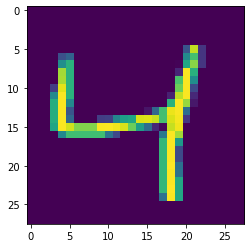

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

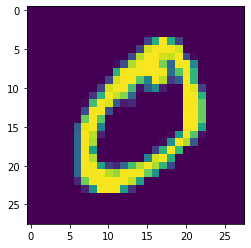

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

# Data Preprocessing

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building the Neural Network Model

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compiling the Model

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Training the Model

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9170 - val_loss: 0.1609 - val_accuracy: 0.9504
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1220 - accuracy: 0.9635 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 0.1260 - val_accuracy: 0.9615
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0937 - val_accuracy: 0.9707
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0873 - val_accuracy: 0.9752
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0933 - val_accuracy: 0.9740
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0941 - val_accuracy:

# Evaluating the Model

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 641us/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

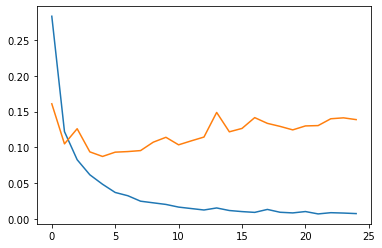

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

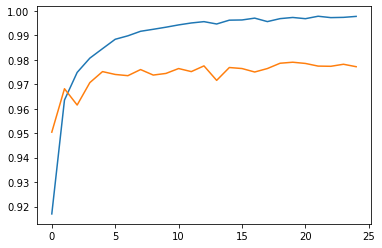

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

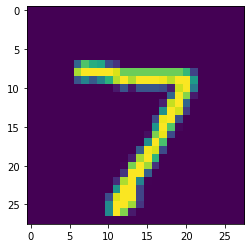

In [18]:
plt.imshow(X_test[0])

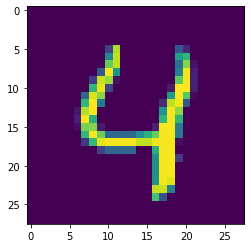

In [19]:
plt.imshow(X_test[4])

# Making Predictions

In [20]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 14ms/step


array([[9.7629979e-21, 4.3715313e-14, 1.2084640e-15, 2.2789687e-11,
        1.5725980e-21, 3.5466450e-16, 2.3200225e-20, 1.0000000e+00,
        8.3790832e-18, 4.1298048e-11]], dtype=float32)

In [21]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 0s/step


array([7], dtype=int64)

In [22]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 4ms/step


array([4], dtype=int64)

# THANK YOU !!